# Synthetix v3 perps


In [460]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Non-USD Collateral (Margin) Payoff Simulation


### `$ETH` Denominated Margin & `$BTC` Perpetual Futures Contract


#### `$ETH` Spot Price @ Entry

Units: `$USD/$ETH`


In [461]:
eth_spot_price_at_entry = 100

#### `$BTC` Spot Price @ Entry

Units: `$USD/$BTC`


In [462]:
btc_spot_price_at_entry = 10000

#### Margin @ Entry

Units: `$ETH`


In [463]:
margin_at_entry = 1

#### `$BTC` Perpetual Futures Contract

Units: `$BTC`


In [464]:
contract_size = 2

#### `$ETH` Spot Price @ Exit

Units: `$USD / $ETH`


In [465]:
eth_spot_price_at_exit = 200

#### `$BTC` Spot Price @ Exit

Units: `$USD/$BTC`


In [466]:
btc_spot_price_at_exit = 20000

#### Profit / Loss

Units: `$USD`


In [467]:
PnL = (contract_size * (btc_spot_price_at_exit - btc_spot_price_at_entry)) - (
    margin_at_entry * eth_spot_price_at_entry
)
PnL

19900

#### Margin @ Exit

Units: `$USD`


In [468]:
margin_at_exit_usd = margin_at_entry * eth_spot_price_at_exit
margin_at_exit_usd

200

#### Total Return

Units: `$USD`


In [469]:
total_return = PnL + margin_at_exit_usd - (margin_at_entry * eth_spot_price_at_entry)
total_return

20000

Change in Spot Price of Base Asset (since entry)

-   Units: `$USD/$BTC`


In [470]:
Δbase = np.linspace(10000, 15000, 100)

Change in Spot Price of Multicollateral Margin (since entry)

-   Units: `$USD/$ETH`


In [471]:
Δmargin = np.linspace(1000, 2000, 100)

Plot of Payoff (as a function of spot price*s*)


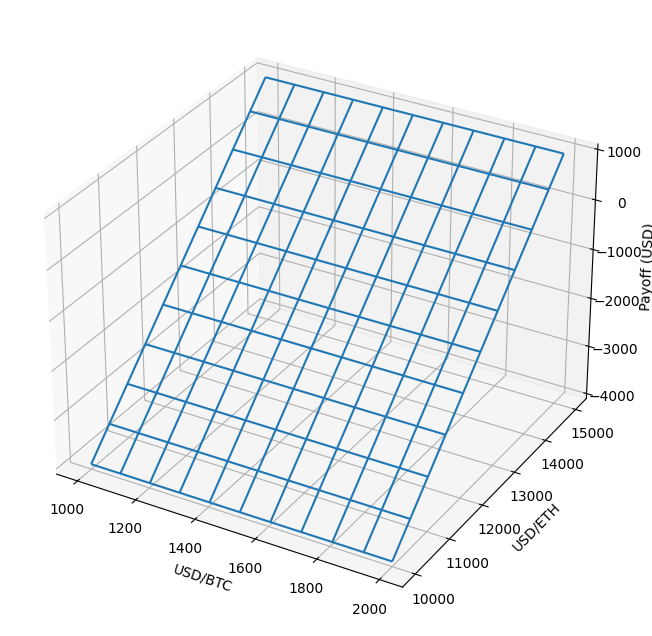

In [472]:
# Assuming Δbase and Δmargin are 1D numpy arrays
Δbase_2D, Δmargin_2D = np.meshgrid(Δbase, Δmargin)

# Constants
eth_spot_price_at_entry = 1500
btc_spot_price_at_entry = 12500
contract_size = 1
margin_at_entry = 1

# Vectorized calculation of PnL and payoff
PnL = contract_size * (Δbase_2D - btc_spot_price_at_entry) - (
    margin_at_entry * Δmargin_2D
)
margin_at_exit_usd = margin_at_entry * Δmargin_2D
payoff_matrix = PnL + margin_at_exit_usd - (margin_at_entry * eth_spot_price_at_entry)

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection="3d")
ax.plot_wireframe(Δmargin_2D, Δbase_2D, payoff_matrix, rstride=10, cstride=10)

# Labeling the axes
ax.set_xlabel("USD/BTC")
ax.set_ylabel("USD/ETH")
ax.set_zlabel("Payoff (USD)")

plt.show()